## Time Series EDA

In [2]:
# install pandas data reader
!pip install pandas-datareader


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [6]:
data = pdr.get_data_yahoo("TSLA")

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-15,25.333332,24.846666,24.967333,25.320667,81307500.0,25.320667
2017-09-18,25.974001,25.178667,25.350000,25.666668,107820000.0,25.666668
2017-09-19,25.492666,24.904667,25.333332,25.006666,96778500.0,25.006666
2017-09-20,25.216667,24.738001,24.866667,24.927334,73786500.0,24.927334
2017-09-21,25.122000,24.300667,24.993334,24.431999,69273000.0,24.431999


<AxesSubplot:xlabel='Date'>

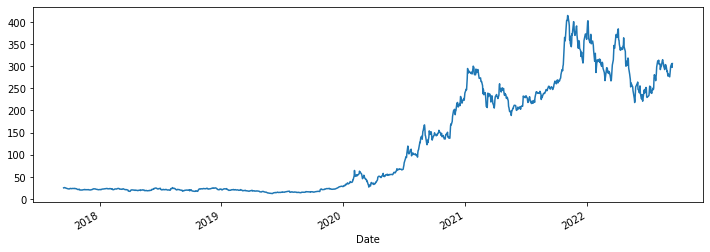

In [13]:
data["High"].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

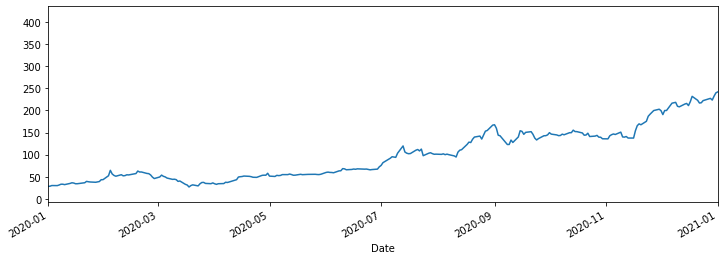

In [17]:
# xlimit 
data["High"].plot(xlim=["2020-01-01", "2021-01-01"],figsize=(12, 4))

<AxesSubplot:xlabel='Date'>

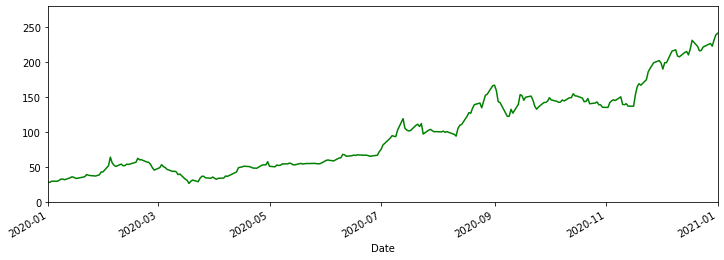

In [19]:
# ylimit and coloring
data["High"].plot(xlim=["2020-01-01", "2021-01-01"],ylim=[0, 280], c="green", figsize=(12, 4))

<AxesSubplot:xlabel='Date'>

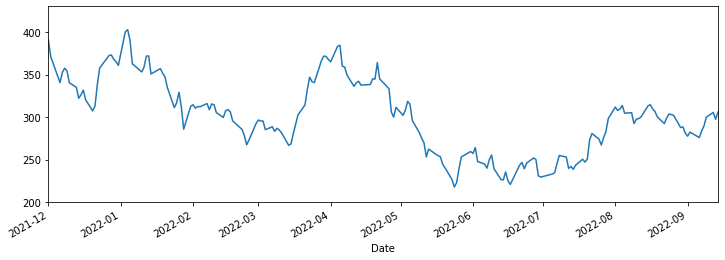

In [23]:
# last 10 months stock
data["High"].plot(xlim=["2021-12-01", "2022-09-14"], ylim=[200, 430], figsize=(12, 4),)

In [24]:
data.index

DatetimeIndex(['2017-09-15', '2017-09-18', '2017-09-19', '2017-09-20',
               '2017-09-21', '2017-09-22', '2017-09-25', '2017-09-26',
               '2017-09-27', '2017-09-28',
               ...
               '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-06',
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-12',
               '2022-09-13', '2022-09-14'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [27]:
share_open = data.loc["2021-12-01":"2022-09-14"]["Open"]

In [28]:
share_open

Date
2021-12-01    386.899994
2021-12-02    366.353333
2021-12-03    361.596680
2021-12-06    333.836670
2021-12-07    348.066681
                 ...    
2022-09-08    281.299988
2022-09-09    291.670013
2022-09-12    300.720001
2022-09-13    292.899994
2022-09-14    292.239990
Name: Open, Length: 198, dtype: float64

In [29]:
index = data.loc["2021-12-01":"2022-09-14"].index

In [30]:
index

DatetimeIndex(['2021-12-01', '2021-12-02', '2021-12-03', '2021-12-06',
               '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
               '2021-12-13', '2021-12-14',
               ...
               '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-06',
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-12',
               '2022-09-13', '2022-09-14'],
              dtype='datetime64[ns]', name='Date', length=198, freq=None)

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

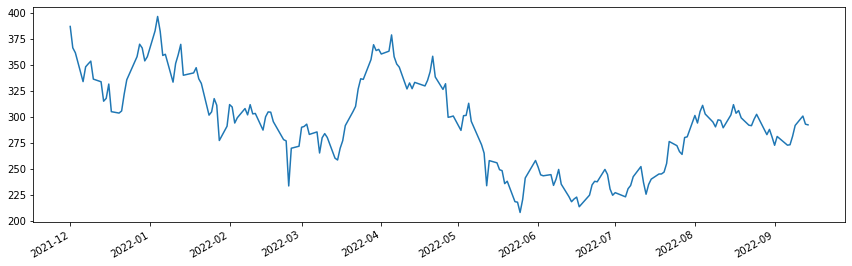

In [37]:
figure , axis=plt.subplots(figsize=(12,4))
plt.tight_layout()
# preventing overlapping the dates
figure.autofmt_xdate() 
axis.plot(index, share_open)

In [38]:
# datetime index
data = data.reset_index()

In [39]:
data.head(2)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-09-15,25.333332,24.846666,24.967333,25.320667,81307500.0,25.320667
1,2017-09-18,25.974001,25.178667,25.350000,25.666668,107820000.0,25.666668


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [41]:
pd.to_datetime(data["Date"])

0      2017-09-15
1      2017-09-18
2      2017-09-19
3      2017-09-20
4      2017-09-21
          ...    
1253   2022-09-08
1254   2022-09-09
1255   2022-09-12
1256   2022-09-13
1257   2022-09-14
Name: Date, Length: 1258, dtype: datetime64[ns]

In [42]:
data = data.set_index("Date", drop=True)

In [43]:
data.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-15,25.333332,24.846666,24.967333,25.320667,81307500.0,25.320667
2017-09-18,25.974001,25.178667,25.350000,25.666668,107820000.0,25.666668


In [44]:
datetime(2021,12, 11)

datetime.datetime(2021, 12, 11, 0, 0)

In [51]:
date = datetime(2022,9, 15)

In [52]:
date.month

9

In [53]:
date.weekday()

3

In [54]:
date.day

15

In [55]:
date.year

2022

## Time Resampling

In [56]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-15,25.333332,24.846666,24.967333,25.320667,81307500.0,25.320667
2017-09-18,25.974001,25.178667,25.350000,25.666668,107820000.0,25.666668
2017-09-19,25.492666,24.904667,25.333332,25.006666,96778500.0,25.006666
2017-09-20,25.216667,24.738001,24.866667,24.927334,73786500.0,24.927334
2017-09-21,25.122000,24.300667,24.993334,24.431999,69273000.0,24.431999


In [57]:
data.resample(rule="A").min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,20.297333,19.508667,19.966667,19.950666,48661500.0,19.950666
2018-12-31,17.355333,16.306000,16.851999,16.704000,46210500.0,16.704000
2019-12-31,12.445333,11.799333,12.073333,11.931333,36984000.0,11.931333
2020-12-31,26.990667,23.367332,24.980000,24.081333,52073100.0,24.081333
2021-12-31,188.736664,179.830002,184.183334,187.666672,29401800.0,187.666672
2022-12-31,217.973328,206.856674,207.949997,209.386673,41864700.0,209.386673


In [58]:
data.resample(rule="A").max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,25.974001,25.178667,25.350000,25.666668,296871000.0,25.666668
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-31,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


In [59]:
type(data.resample(rule="A").max())

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Date'>

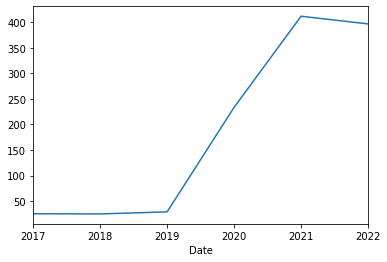

In [60]:
# open share at high value in year

# A = year end frequency
data.resample(rule="A").max()["Open"].plot()

<AxesSubplot:xlabel='Date'>

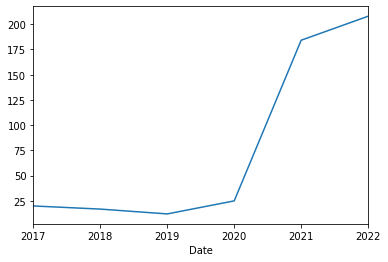

In [61]:
data.resample(rule="A").min()["Open"].plot()

<AxesSubplot:xlabel='Date'>

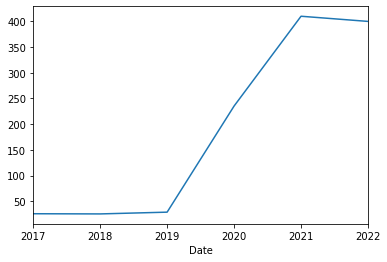

In [62]:
data.resample(rule="A").max()["Close"].plot()

<AxesSubplot:xlabel='Date'>

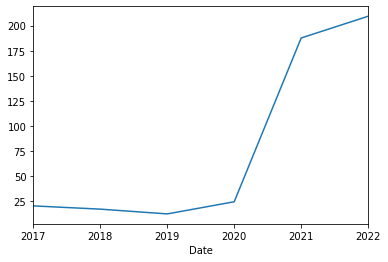

In [63]:
data.resample(rule="A").min()["Close"].plot()

In [66]:
data.resample(rule="QS").min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-01,22.850000,22.360001,22.658667,22.639999,69273000.0,22.639999
2017-10-01,20.297333,19.508667,19.966667,19.950666,48661500.0,19.950666
2018-01-01,17.912001,16.547333,17.099333,17.185333,48294000.0,17.185333
2018-04-01,17.355333,16.306000,16.851999,16.832001,58126500.0,16.832001
2018-07-01,17.889999,16.816668,17.340000,17.549334,54039000.0,17.549334
2018-10-01,17.457333,16.518000,17.016666,16.704000,46210500.0,16.704000
2019-01-01,17.545334,16.964001,17.313999,17.361334,55150500.0,17.361334
2019-04-01,12.445333,11.799333,12.073333,11.931333,76897500.0,11.931333
2019-07-01,14.334667,14.066667,14.240000,14.093333,48382500.0,14.093333


<AxesSubplot:xlabel='Date'>

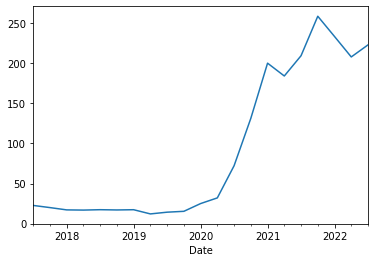

In [64]:
# QS = quartly start frequency
data.resample(rule="QS").min()["Open"].plot()

In [67]:
data.resample(rule="QS").max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-01,25.974001,25.178667,25.350000,25.666668,122391000.0,25.666668
2017-10-01,24.200001,23.608667,23.798668,23.976667,296871000.0,23.976667
2018-01-01,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-04-01,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-07-01,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667
2018-10-01,25.299334,24.450001,25.000000,25.119333,411382500.0,25.119333
2019-01-01,23.466667,22.943333,23.080667,23.153999,362262000.0,23.153999
2019-04-01,19.744667,19.144667,19.219999,19.454000,398206500.0,19.454000
2019-07-01,17.738001,17.210667,17.278000,17.658667,336274500.0,17.658667


<AxesSubplot:xlabel='Date'>

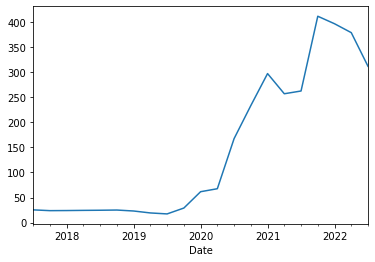

In [65]:
data.resample(rule="QS").max()["Open"].plot()

## Plotting

<AxesSubplot:xlabel='Date'>

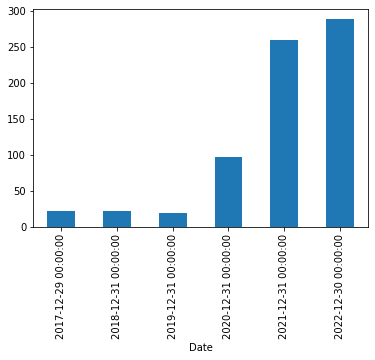

In [70]:
data["Open"].resample(rule="BA").mean().plot(kind="bar")

<AxesSubplot:xlabel='Date'>

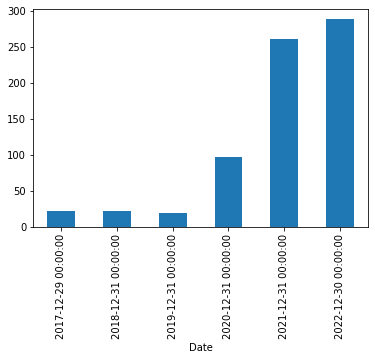

In [71]:
data["Close"].resample(rule="BA").mean().plot(kind="bar")

<AxesSubplot:xlabel='Date'>

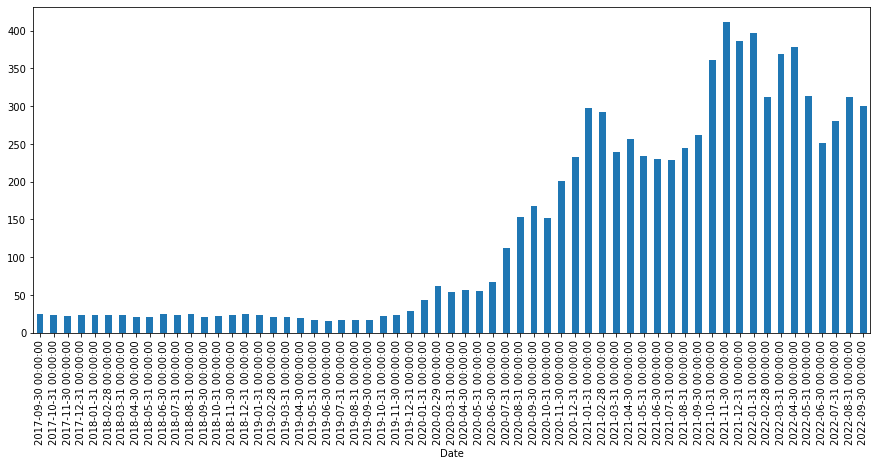

In [73]:
data["Open"].resample(rule="M").max().plot(kind="bar", figsize=(15, 6))

### rolling

In [74]:
data["Open"].rolling(20).mean()

Date
2017-09-15           NaN
2017-09-18           NaN
2017-09-19           NaN
2017-09-20           NaN
2017-09-21           NaN
                 ...    
2022-09-08    291.027496
2022-09-09    290.785330
2022-09-12    291.350497
2022-09-13    290.906163
2022-09-14    289.934830
Name: Open, Length: 1258, dtype: float64

In [78]:
data["open:20 days rolling"] = data["Open"].rolling(20).mean()

In [80]:
data.head(22)

,High,Low,Open,Close,Volume,Adj Close,open:20 days rolling
Date,,,,,,,
2017-09-15,25.333332,24.846666,24.967333,25.320667,81307500.0,25.320667,NaN
2017-09-18,25.974001,25.178667,25.350000,25.666668,107820000.0,25.666668,NaN
2017-09-19,25.492666,24.904667,25.333332,25.006666,96778500.0,25.006666,NaN
2017-09-20,25.216667,24.738001,24.866667,24.927334,73786500.0,24.927334,NaN
2017-09-21,25.122000,24.300667,24.993334,24.431999,69273000.0,24.431999,NaN
2017-09-22,24.660000,23.392000,24.432667,23.406000,122391000.0,23.406000,NaN
2017-09-25,23.831333,22.858667,23.543333,22.999332,114088500.0,22.999332,NaN
2017-09-26,23.416000,22.726667,23.395332,23.016666,107344500.0,23.016666,NaN
2017-09-27,23.432667,22.700001,23.326668,22.731333,90904500.0,22.731333,NaN


<AxesSubplot:xlabel='Date'>

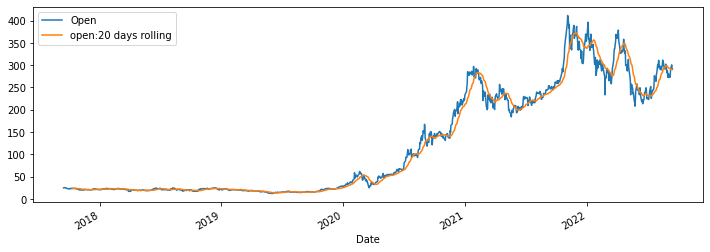

In [82]:
data[["Open","open:20 days rolling"]].plot(figsize=(12, 4))